<a href="https://colab.research.google.com/github/mehelisinha/Python-Programming/blob/Python-Projects/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Customer Churn Prediction for a Telecom Company**

**Title:** Machine Learning Pipeline for Customer Churn Prediction for a Telecom Company  

**Student id:** GH1039518

**Author:** Meheli  Sinha  

**Course/Module:** M505 Intro to AI and Machine
Learning

##**1. Introduction of the Business Context**
### Client Overview
The client is a telecom company in Europe wanting to minimize customer churn through Machine Learning enabled predictions on customers at risk of leaving.

###**Business Problem**
Customer churn has a serious impact on the telecommunications domain. Churn is the loss of subscribing customers, resulting in the loss of revenue. It is always cheaper to retain the existing customers than to get new customers. By predicting churn, the company can proactively take steps to keep high-risk customers through better service and targeted offers.

###**Business Benefits:**
- **Reducing churn rates** by identifying at-risk customers.
- **Increasing revenue** by focusing retention efforts on high-risk customers.
- **Improving customer satisfaction** by addressing concerns early.

###**Data Collection**
The dataset is collected from Kaggle (https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

###**Sample data Overview**
The dataset contains customer information from a telecom company, aiming to predict churn (whether a customer leaves the service). It includes:
- Customer Details
- Account info
- Services Used: Phone service, internet type, streaming, security features.
- Billing Info: Monthly charges, total charges.
- Target Variable: Churn (Yes = customer left, No = customer stayed).

###**Formulating as a Machine Learning Task**
In this project, targetis to build a ML model to determine if a customer will leave given their use of the service, contract type, and other information that may influence their decision. We frame the project on the basis of following:

- *Churn = 1* indicates customer iss leaving.
- *Churnn = 0* indicates customer is staying.

###**Importing the required libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

###**Fetching and viewing Data**

In [ ]:
df = pd.read_csv('Telcom-Customer-Churn.csv')
print(df.shape)

(7043, 21)


###**Target Variable Distribution**

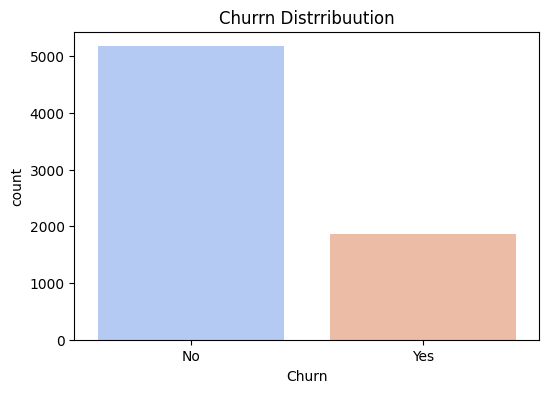

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn', palette='coolwarm')
plt.title("Churrn Distrribuution")
plt.show()

###**Label Encoding**
Yes = 1, No = 0

In [ ]:
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])

###**Reviewing dataset for duplicates**

In [ ]:
dplcte_rws = df.duplicated().sum()
print(f"\nNo. of Repeated Entries: {dplcte_rws}")


No. of Repeated Entries: 0


###**Convert categorical variable to numerical**

In [ ]:
Xx = pd.get_dummies(df.drop(columns=['Churn']), drop_first=True)
yy = df['Churn']

###**Divide dataset to training and testing data**
80% dataset is divided to train data and 20% dataset is split to test data

In [ ]:
Xa_training, Xa_testing, ya_training, ya_testing = train_test_split(Xx, yy, test_size=0.2, random_state=42)

###**Correct data distribution**


In [ ]:
smootee = SMOTE(random_state=42)
Xa_training, ya_training = smootee.fit_resample(Xa_training, ya_training)

###**Feature scaling**

In [ ]:
scaaler = StandardScaler()
Xa_training = scaaler.fit_transform(Xa_training)
Xa_testing = scaaler.transform(Xa_testing)

###**Hyperparameter tuning using Randomized search**
Defining a parameter grid for Random Forest and perform Randomized Search to find the best hyperparameters efficiently.
Randomly testing 20 combinations and training leveraging best parameters from RandomizedSearchCV

In [ ]:
param_dist = {
    'n_estimators': [100, 150],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}
random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

random_search.fit(Xa_training, ya_training)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 150]},
                   random_state=42, scoring='accuracy')

###**Get best parameters and re-train Random Forest**

In [ ]:
bst_prms = random_search.best_params_
rff_modell = RandomForestClassifier(**bst_prms, random_state=42)
rff_modell.fit(Xa_training, ya_training)
y_predd_rff = rff_modell.predict(Xa_testing)

###**Evaluation of Random Forest**
- Random Forest is being used because it is a robust, reduces overfitting, and provides feature importance for better interpretation.
- K-Nearest Neighbors modeL gives a lesser accuracy score of 73.46%.
- Naive Bayes Classifier gives the least accuracy score of 28.25%










In [ ]:
acrcy_rff = accuracy_score(ya_testing, y_predd_rff) * 100
print(f'Raanndom Forrest Acuracy: {acrcy_rff:.2f}%')
print('Clasification Reporrt:\n', classification_report(ya_testing, y_predd_rff))
cmm_rff = confusion_matrix(ya_testing, y_predd_rff)

Raanndom Forrest Acuracy: 74.88%
Clasification Reporrt:
               precision    recall  f1-score   support

           0       0.92      0.72      0.81      1036
           1       0.52      0.83      0.64       373

    accuracy                           0.75      1409
   macro avg       0.72      0.77      0.72      1409
weighted avg       0.81      0.75      0.76      1409



###**Confusion Matrix**
To understand classification performance.

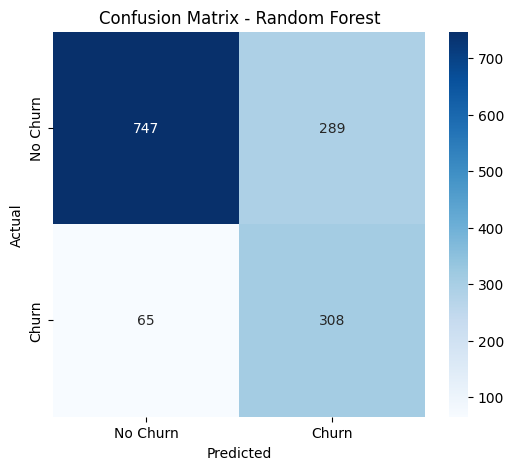

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(cmm_rff, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

##**Conclusion**
###Strengths of the Solution:
- Uses Random Forest, which is powerful models for classification.
- Handles class imbalance effectively using SMOTE, ensuring fairer predictions.
- Implements hyperparameter tuning RandomizedSearchCV to optimize model performance.

###Limitations of the Solution:
- The model might still be prone to overfitting.
- Feature engineering could be improved with domain expertise for better predictive power.

###Implications of the Results:
- The model helps in identifying customers likely to churn, allowing proactive retention strategies.
- By understanding key factors influencing churn, businesses can personalize customer engagement and improve services.

###Data-Driven Recommendations:
- Improve customer experience by addressing issues that strongly correlate with churn.
- Develop targeted retention campaigns for high-risk customers using personalized offers.